In [ ]:
import sys, os
sys.path.append(os.path.abspath(".."))  # make sure volsense_pkg is found

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from volsense_core.data_fetching.fetch_yf import fetch_ohlcv, compute_returns_vol


Price        return vol_realized
Ticker                          
count   5183.000000  5183.000000
mean       0.000402     0.157703
std        0.012086     0.111442
min       -0.115887     0.034157
25%       -0.003960     0.093039
50%        0.000705     0.129460
75%        0.005805     0.185270
max        0.135577     0.936683


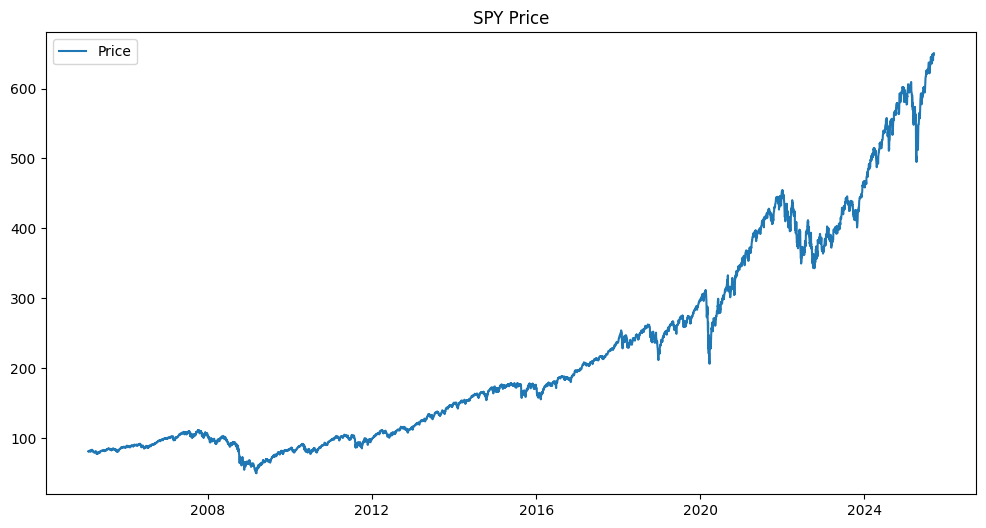

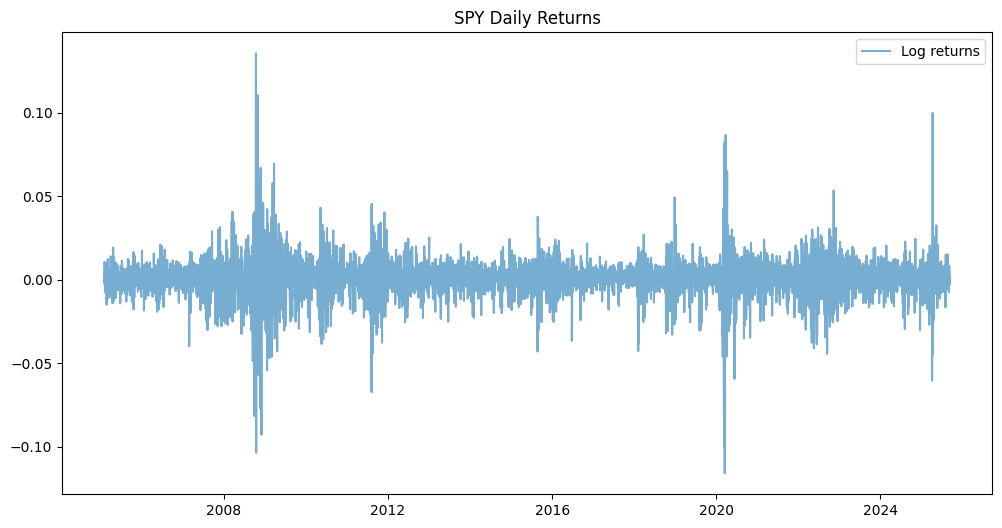

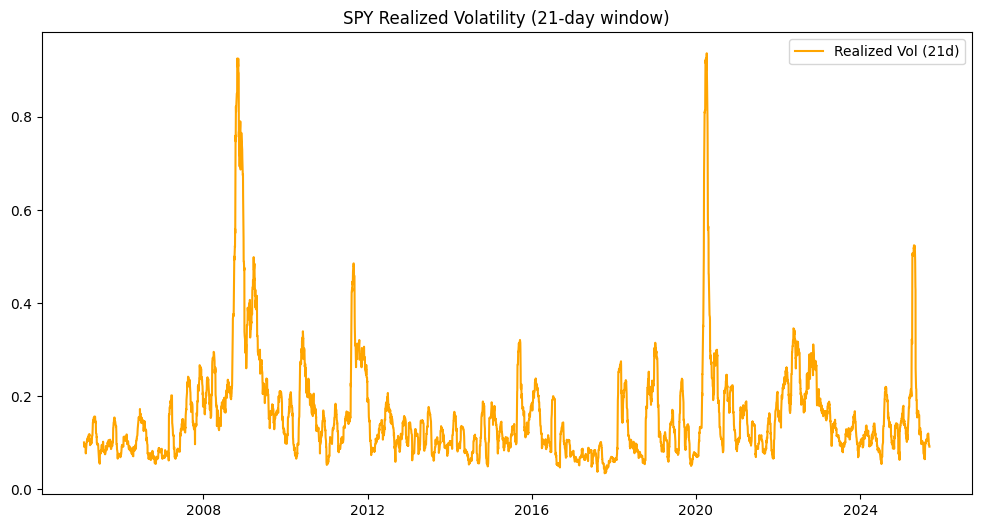

In [2]:
# === Fetch Data ===
ticker = "SPY"
df = fetch_ohlcv(ticker, start="2005-01-01")

# === Compute returns + vol ===
df = compute_returns_vol(df, window=21)

# === Basic Stats ===
print(df[["return", "vol_realized"]].describe())

# === Plots ===
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["close"], label="Price")
plt.title(f"{ticker} Price")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["return"], label="Log returns", alpha=0.6)
plt.title(f"{ticker} Daily Returns")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["vol_realized"], label="Realized Vol (21d)", color="orange")
plt.title(f"{ticker} Realized Volatility (21-day window)")
plt.legend()
plt.show()